In [2]:
renv::use(
  "dplyr", "tidyr", "duckdb", "dbplyr", "ggplot2", "basemaps",
  attach = TRUE, sandbox = FALSE
)

The following package(s) will be installed:
- basemaps [0.0.5]
- dbplyr   [2.4.0]
- dplyr    [1.1.4]
- duckdb   [0.9.2-1]
- ggplot2  [3.4.4]
- tidyr    [1.3.1]
These packages will be installed into "/tmp/RtmpEHjI6e/renv-use-libpath-34d464e00f03".

# Installing packages --------------------------------------------------------
- Installing dplyr ...                          OK [linked from cache]
- Installing tidyr ...                          OK [linked from cache]
- Installing duckdb ...                         OK [linked from cache]
- Installing dbplyr ...                         OK [linked from cache]
- Installing ggplot2 ...                        OK [linked from cache]
- Installing basemaps ...                       OK [linked from cache]


In [16]:
con <- dbConnect(
  duckdb(), dbdir = "../processing/globalamfungi_lsu.duckdb", read_only = FALSE
)
inner_join(
  tbl(con, "occurances") |> select(sample_id, taxon_id, abundance, total),
  tbl(con, "samples") |> select(id, longitude, latitude),
  by = join_by(sample_id == id)
) |>
  inner_join(
    tbl(con, "taxa") |> select(accession, Species),
    by = join_by(taxon_id == accession)
  ) |>
  compute(name = "locations")

# Source:   table<locations> [?? x 7]
# Database: DuckDB v0.9.2 [robert@Linux 6.6.9-artix1-1:R 4.3.2/../processing/globalamfungi_lsu.duckdb]
   sample_id taxon_id abundance  total longitude latitude Species               
       <int> <chr>        <int>  <int>     <dbl>    <dbl> <chr>                 
 1      7805 MT832194        12 221538    -116.      43.3 Rhizophagus irregular…
 2      7806 MT832194        41 951993    -116.      43.3 Rhizophagus irregular…
 3      7814 MT832194         2 139418    -116.      43.3 Rhizophagus irregular…
 4      8077 MT832194         5  30383    -116.      43.3 Rhizophagus irregular…
 5      7929 MT832194         2  54553    -116.      43.3 Rhizophagus irregular…
 6      8007 MT832194         1    765    -122.      48.8 Rhizophagus irregular…
 7      7806 MT832194         1 951993    -116.      43.3 Rhizophagus irregular…
 8      7807 MT832194         1  20890     -99.6     24.9 Rhizophagus irregular…
 9      7806 MT832194         1 951993    -116.  

# Source:   SQL [?? x 2]
# Database: DuckDB v0.9.2 [robert@Linux 6.6.9-artix1-1:R 4.3.2/../processing/globalamfungi_lsu.duckdb]
   taxon_id      n
   <chr>     <dbl>
 1 FJ461853   1737
 2 FM992391     65
 3 FN547496  48221
 4 FR750072    525
 5 FR750203    780
 6 MG710519    194
 7 MH560604    758
 8 MT832216     31
 9 MT832181 160508
10 MT832182  62591
# ℹ more rows

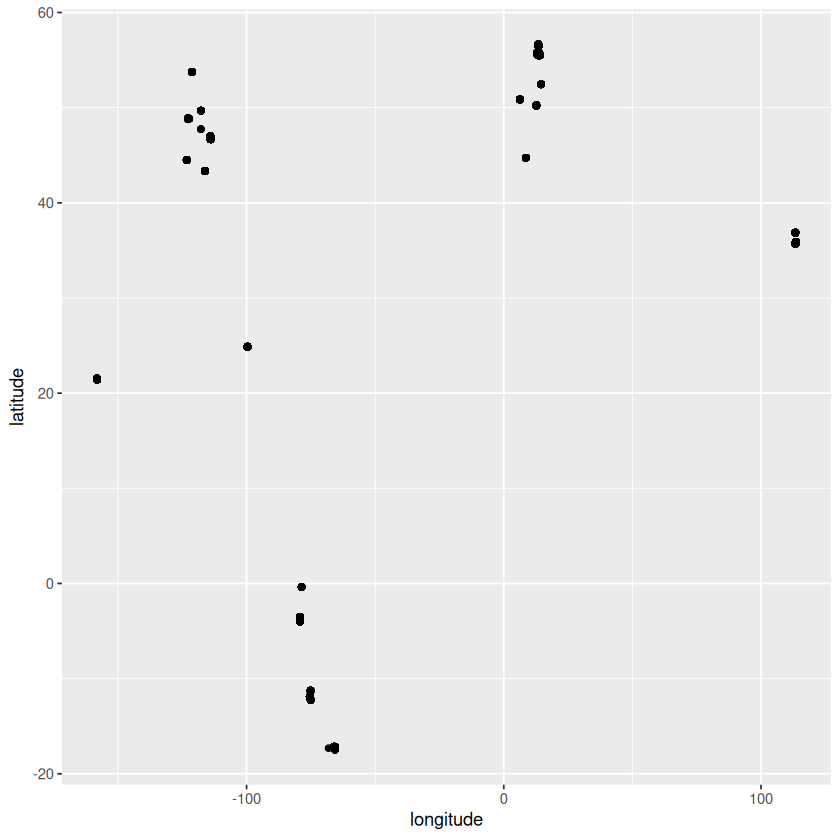

In [17]:
count(tbl(con, "locations"), taxon_id)

ggplot(
  data = tbl(con, "locations")
) +
  geom_point(aes(x = longitude, y = latitude))

In [14]:
dbDisconnect(con, shutdown = TRUE)